# Classification

One method used to make classification is through Linear Regression Models and map all the predictions greater than 0.5 as a 1, and all less than 0.5 to 0. However this method doesn't work well because classification is not a linear function.

The Classification problem is just like the regression problem, except that the values we need to predict take on only a small number of discrete values. For now, we are going to talk only about **binary classification problem** in which $y$ only take two possible values, $0$ and $1$. For example, think a little about a **Spam Classifier** in this case, yo have two possible classes, one would be to detect that the e-mail is Spam and the other one to say that the e-mail is not Spam. You have the e-mails to make the training in our $x^{i}$ and the classification for this trainig set arranged in $y^{i}$.

# Hypothesis Representation

We could approach a solution to our classification problem taking our old linear regression model, and ignoring the fact that $y$ is discrete. However, it is possible to obtain bad results trying to solve our problem in this way. What we are going to do is to use the **Logistic Function** to have always our output between $0$ and $1$. We can do this applying the **Logistic Function** to $\theta^{T}x$. So in this case our new hypothesis became the following:

$$z = \theta^{T}x\\
h_{\theta}(x) = g(z)\\
g(z) = \frac{1}{1+e^{-z}}$$

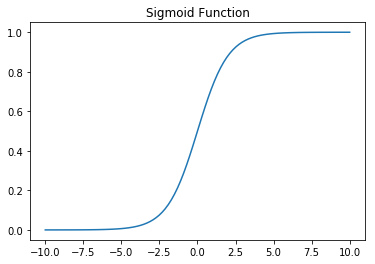

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(suppress=True) # This command is used to avoid the scientific output

## Generate some numbers to plot the sigmoid function
x = np.linspace(-10,10,100)
y = 1 / (1 + np.exp(-x))

plt.figure()
plt.title('Sigmoid Function')
plt.plot(x,y)


The **Logistic Function** takes any real number and transforms it in a value between $0$ and $1$, very useful to make classification tasks. $h_{\theta}(x)$ give us the **probability** that our output is $1$. For example if $h_{\theta}(x) = 0.7$ gives us the probability of 70% that our output is $1$.

# Decision Boundary

Our **Logistic Regression** hypothesis representation is given by:

$$z = \theta^{T}x\\
h_{\theta}(x) = g(z)\\
g(z) = \frac{1}{1+e^{-z}}$$

In this case we could translate this representation to the following, in order to have our $0$ and $1$ for classification purposes:

$$h_{\theta}(x) >= 0.5 \rightarrow y = 1\\
h_{\theta(x)} < 0.5 \rightarrow y = 0$$

Our **Logistic Function** gives a value greater or equal than 0.5 if the input is greater or equal than 0, let's see:

$$g(z) >= 0.5 \\ z >= 0$$

Remember this:

$$z=0, e^{0}=1 \Rightarrow g(z)=\frac{1}{2}\\
z \rightarrow \infty, e^{-\infty} \rightarrow 0 \Rightarrow g(z)=1\\
z \rightarrow -\infty, e^{\infty} \rightarrow \infty \Rightarrow g(z)=0$$

So if the input to function $g$ is $\theta^{T}x$, then that means:

$$h_{\theta}(x)=g(\theta^{T}x)>=0.5\\
\theta^{T}x>=0$$

Now, we can say:

$$\theta^{T}x>=0\Rightarrow y=1\\
\theta^{T}x<0\Rightarrow y=0$$

The **Decision Boundary** is the line that separates the area where $y=0$ and where $y=1$. It is created by our hypothesis function.

## Example

If our $\theta$ vector is defined by:

$$\theta = \begin{bmatrix}-3\\1\\1\end{bmatrix}\\h_{\theta}(x)=g(\theta^{T}x)\\
h_{\theta}(x)=g(\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2})\\
h_{\theta}(x)=g(-3+x_{1}+x_{2})$$

In the above example we will predict $y = 1$ if $-3+x_{1}+x_{2}>=0$. In other words:
$$-3+x_{1}+x_{2}>=0\\
x_{1}+x_{2}>=3 \Rightarrow y = 1$$

And we will predict $y = 0$ if:
$$x_{1}+x_{2}<3 \Rightarrow y = 0$$

And our **Decision Boundary** is given by the following equation:
$$x_{1}+x_{2}=3$$

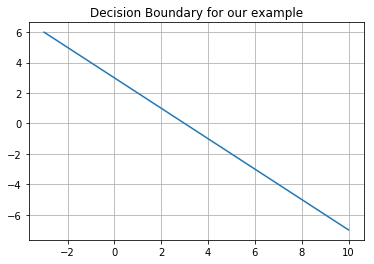

In [3]:
x = np.linspace(-3,10,100)
y = 3 - x
plt.figure()
plt.title('Decision Boundary for our example')
plt.plot(x,y)
plt.grid()

## No Linear Decision Boundary

It is important to note that the **Decision Boundary** haven't to be **Linear**, you could have for instance, a function that describes a circle or any shape to fit your data. 

$$\theta = \begin{bmatrix}-1\\0\\0\\1\\1\end{bmatrix}\\h_{\theta}(x)=g(\theta^{T}x)\\
h_{\theta}(x)=g(\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+\theta_{3}x_{1}^{2}+\theta_{4}x_{2}^2\\
h_{\theta}(x)=g(-1+0*x_{1}+0*x_{2}+1*x_{1}^{2}+1*x_{2}^{2})\\
h_{\theta}(x)=g(-1+x_{1}^{2}+x_{2}^{2})$$

In this case you are going to predict a value of $y=1$ if:

$$-1+x_{1}^{2}+x_{2}^{2} >= 0\\
x_{1}^{2}+x_{2}^{2} >= 1$$

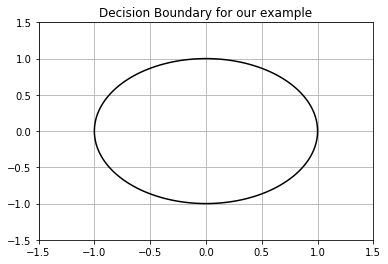

In [18]:
x = np.linspace(-1.5, 1.5, 400)
y = np.linspace(-1.5, 1.5, 400)
x, y = np.meshgrid(x, y)
plt.figure()
plt.title('Decision Boundary for our example')
plt.contour(x, y,(x**2 + y**2), [1] ,colors='k')
plt.grid()

In the above graph, as you can see, you could say that everything inside the circle is going to be classified in one of our classes, and everything outside the circle is the other class.

## Logistic Regression Model

### Cost Function

Our problem has changed, so we cannot use the same **Cost Function** that we used in our **Linear Regression Model**. This is because the **Logistic Regression** causes that our output become to wavy, this makes our output to have a lot of local optima. In other words, it will not be a **convex function**.

So, our **cost function** in this case will be:

$$Cost(h_{\theta}(x),y) = \left \{ -log(h_{\theta}(x)) \rightarrow y = 1\\ 
-log(1 - h_{\theta}(x)) \rightarrow y = 0\right \}\\
J(\theta) = \frac{1}{m}\sum_{i=1}^{m}Cost(h_{\theta}(x^{(i)}),y^{(i)})$$

When $y=1$, we get the following plot for $J(\theta)$ vs $h_{\theta}(x)$:

![plotLogisticRegression](./images/y1LogReg.png)

When $y=1$, we get the following plot for $J(\theta)$ vs $h_{\theta}(x)$:

![plotLogisticRegression0](./images/y0LogReg.png)

$$Cost(h_{\theta}(x),y)=0, h_{\theta}(x)=y \\
Cost(h_{\theta}(x),y)\rightarrow \infty, y=0, h_{\theta}(x) \rightarrow 1 \\
Cost(h_{\theta}(x),y)\rightarrow \infty, y=1, h_{\theta}(x) \rightarrow 0$$

In the above equation, you could note that the cost function penalizes with values of $\infty$ the cases where our hypothesis is wrong. In other cases, when our hypothesis is correct you obtain a value of $0$.

### Simplified Cost Function and Gradient Descent

In order to have our implementation so simple, we could compress our $Cost(h_{\theta}(x),y)$ in one single equation:

$$Cost(h_{\theta}(x),y) = -ylog(h_{\theta}(x)) - (1-y)log(1-h_{\theta}(x))$$

So we could write now our fully cost function as follows:

$$J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}log(h_{\theta}(x^{(i)}))+(1-y^{(i)})log(1-h_{\theta}(x^{(i)}))]$$

The above **Cost Function** is going to permit us to fit $\theta$ parameters in order to minimize it $\min_{\theta}J(\theta)$ to make a new prediction based on $h(\theta)(x) = \frac{1}{1+e^{-\theta^{T}x}}$.

### Gradient Descent

$$J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}log(h_{\theta}(x^{(i)}))+(1-y^{(i)})log(1-h_{\theta}(x^{(i)}))]$$

We want to $\min_{\theta}J(\theta)$:

Repeat:

$$\left\{ \theta_{j} := \theta_{j} - \alpha \frac{\partial}{\partial \theta_{j}} J(\theta) \right\}$$